# MOVIES RECOMMENDATION
# Introduction
TEXT

In [1]:
"""
CONFIGURATION:

In this cell we can read our data and and do all the necessary imports.
"""

import pandas as pd
import numpy as np
from math import sqrt

reviews = pd.read_csv("reviews.tsv", sep="\t")
movie_info = pd.read_csv("movie_info.tsv", sep="\t")

### NOTES
Sites:
* https://hackernoon.com/popularity-based-song-recommendation-system-without-any-library-in-python-12a4fbfd825e?gi=3c12b77c73f2
* https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/
* https://towardsdatascience.com/building-a-movie-recommendation-engine-using-pandas-e0a105ed6762
* https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d
* https://blog.cambridgespark.com/tutorial-practical-introduction-to-recommender-systems-dbe22848392b


NOTES:

* Neste caso todos os que tem reviews viram o filme

* Numa primeira faze podemos eliminar todos os que nao tem rating

* Podemos utilizar text mining no review para eferir o rating mas nao é necessario

* Tivemos que eliminar os reviews que tinham o valor > que o maximo da scale (referir no relatorio a percentagem que isso ocupava nos reviews)

Popularity:
    
    Binary - conta os que têm mais reviews
    
    Non_Binary - conta os que tẽm mais reviews com melhor rating
    
TODO:
    
    Remover ratings sem escala; X
    
    Podemos eliminar todos que nao tem rating e review X
    


In [2]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [3]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Problem definition, exploratory data analysis and pre-processing steps
What was done:
* Removed reviews with no rating or review;
* Converted all ratings to one single scale /10;
* TODO

In [4]:
"""
# Generates column for every genre type in each column
# NOT WORKING YET
# Splits genre into a series of list containing each genre type
movie_info['genre'] = movie_info.genre.str.split('|')

# Removes rows that have no information 
movie_info.dropna(inplace=True)

# Gets a list of each unique genre type
genre_columns = list(set([j for i in movie_info['genre'].tolist() for j in i]))

# Iterating over every list to create and fill values into columns.
for j in genre_columns:
    movie_info[j] = 0
for i in range(movie_info.shape[0]):
    for j in genre_columns:
        if(j in movie_info['genre'].iloc[i]):
            movie_info.loc[i,j] = 1

movie_info"""

"\n# Generates column for every genre type in each column\n# NOT WORKING YET\n# Splits genre into a series of list containing each genre type\nmovie_info['genre'] = movie_info.genre.str.split('|')\n\n# Removes rows that have no information \nmovie_info.dropna(inplace=True)\n\n# Gets a list of each unique genre type\ngenre_columns = list(set([j for i in movie_info['genre'].tolist() for j in i]))\n\n# Iterating over every list to create and fill values into columns.\nfor j in genre_columns:\n    movie_info[j] = 0\nfor i in range(movie_info.shape[0]):\n    for j in genre_columns:\n        if(j in movie_info['genre'].iloc[i]):\n            movie_info.loc[i,j] = 1\n\nmovie_info"

In [5]:
# Get all unique ids from reviews
reviews_ids = list(set(reviews['id'].tolist()))

# Remove movies that dont have reviews
movie_info = movie_info[movie_info['id'].isin(reviews_ids)]

print("Number of reviews: ", len(reviews))
print("Number of movies: ", len(movie_info))

# Find reviews with no rating
print("Number of reviews with no rating: ", len(reviews.loc[reviews['rating'].isnull()]))

# Find reviews with no rating and no review
# possivle escala trenaria, viu e gostou, viu e nao gostou, viu
print("Number of reviews with no rating and review:", len(reviews.loc[reviews['rating'].isnull() & reviews['review'].isnull()]))

Number of reviews:  54432
Number of movies:  1135
Number of reviews with no rating:  13517
Number of reviews with no rating and review: 27


## Pre-Processing 

In [6]:
from pre_processing import *

Remove reviews with no rating

In [7]:
reviews = reviews.loc[~reviews['rating'].isnull()]

### Ratings
```
Converting all ratings to one single scale /10
For any v/m , being v the value and m the max value in the scale,
the new rating will be (v * 10)/m
Note: We won't to be able to convert single numbers like ['1', '6', ...] since we don't know the corresponding scale.
      Wee also need to verify if the v is bigger than m
```

In [8]:
convert_ratings(reviews)

# Remove reviews with no scale
reviews = reviews.loc[~reviews['rating'].isnull()]
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,6.000000,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",4.166667,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,4.000000,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",5.833333,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,5.000000,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


### Creating necessary variables and DataFrames

In [9]:
reviews_rs, critics, critic_uid = create_rs_df(reviews)
reviews_rs.head()

,critic_uid,id,rating
0,0,3,6.000000
6,1,3,4.166667
7,2,3,4.000000
11,3,3,5.833333
12,4,3,5.000000


In [10]:
# Create DataFrame with average rating for each movie:
ratings_mean_count = pd.DataFrame(reviews.groupby('id')['rating'].mean())

# Add number of ratings per movie to DataFrame:
ratings_mean_count['rating_counts'] = pd.DataFrame(reviews.groupby('id')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
id,,
3,5.742925,106
5,6.444444,18
6,5.890244,41
8,6.899123,38
10,5.605932,59


### Exploratory Data Analysis

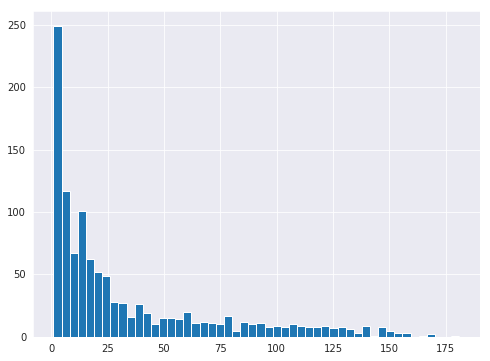

In [11]:
"""
PLOT:

Number of ratings per movie
"""

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  

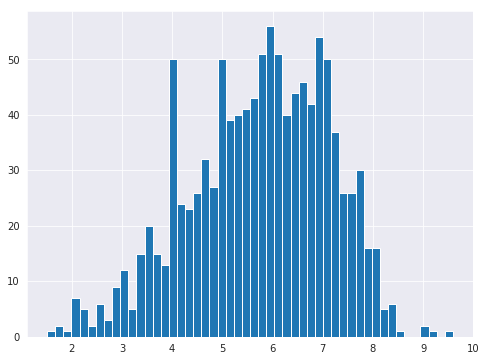

In [12]:
"""
PLOT:

Average ratings per movie
"""

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50)  

<Figure size 576x432 with 0 Axes>

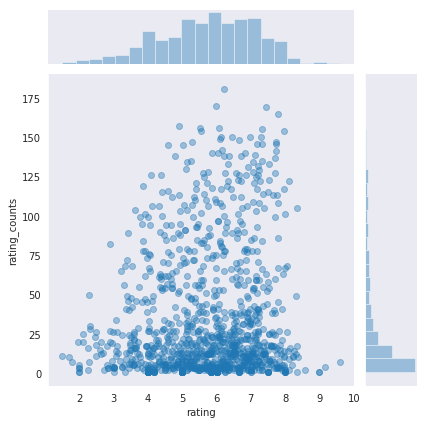

In [13]:
"""
PLOT:

Average ratings against number of ratings per movie
"""

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

# Experimental Setup and Obtained Results
## Recommender Systems

###  1. BINARY

In [14]:
from recommender_systems import Binary
binary = Binary(reviews, reviews_rs, critic_uid)

### a) Popularity:

In [15]:
# Top 5 Movies Recommendation
binary.binary_popularity_based(2)

id
1136    181
1071    170
Name: rating, dtype: int64

### b) Association Rules:


In [16]:
df = binary.ar_create_df()
df.head()

,3,5,6,8,10,13,14,15,17,19,...,1987,1991,1992,1993,1995,1996,1997,1998,1999,2000
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,True,False,False,...,True,True,True,True,False,False,True,False,True,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
frequent_itemsets = binary.frequent_itemsets(df, min_support=0.03, verbose=0)
frequent_itemsets

,support,itemsets
0,0.043659,(3)
1,0.060291,(23)
2,0.034511,(26)
3,0.031185,(40)
4,0.052391,(57)
5,0.054886,(65)
6,0.057796,(77)
7,0.040748,(95)
8,0.033680,(99)
9,0.039085,(108)


In [18]:
binary.association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1017),(338),0.056965,0.063617,0.030353,0.532847,8.375793,0.026729,2.004444
1,(1695),(1935),0.051975,0.059044,0.036590,0.704000,11.923380,0.033522,3.178907
2,(1935),(1695),0.059044,0.051975,0.036590,0.619718,11.923380,0.033522,2.492954
3,(841),(443),0.059459,0.057380,0.034096,0.573427,9.993412,0.030684,2.209747
4,(443),(841),0.057380,0.059459,0.034096,0.594203,9.993412,0.030684,2.317761
5,(841),(1071),0.059459,0.068607,0.032432,0.545455,7.950413,0.028353,2.049064
6,(1585),(1935),0.051143,0.059044,0.032017,0.626016,10.602599,0.028997,2.516035
7,(1935),(1585),0.059044,0.051143,0.032017,0.542254,10.602599,0.028997,2.072887
8,(976),(1071),0.050312,0.068607,0.032848,0.652893,9.516404,0.029396,2.683299
9,(1525),(1136),0.067360,0.073181,0.034096,0.506173,6.916737,0.029166,1.876809


### c) Collaborative Filtering:
Based on: 
* https://medium.com/radon-dev/item-item-collaborative-filtering-with-binary-or-unary-data-e8f0b465b2c3

In [19]:
# Top 5 Movies Recommendation for movie_id = 3
binary.binary_collab_item_based(3, 5)

Top 5 movie recommendation based on movie_id = 3:
movie_id: 3 with similarity: 1.0
movie_id: 1646 with similarity: 0.132
movie_id: 188 with similarity: 0.13
movie_id: 1136 with similarity: 0.124
movie_id: 23 with similarity: 0.122
movie_id: 1083 with similarity: 0.119


In [20]:
# Top 5 Movies Recommendation for user 'PJ Nabarro'
binary.binary_collab_user_based('PJ Nabarro', 5)

Top 5 movie recommendation based on critic_id = PJ Nabarro:
movie_id: 1110 with similarity: 0.026
movie_id: 821 with similarity: 0.026
movie_id: 968 with similarity: 0.011
movie_id: 810 with similarity: 0.011
movie_id: 1172 with similarity: 0.011


###  2. NON-BINARY

In [21]:
from recommender_systems import NonBinary
non_binary = NonBinary(reviews, reviews_rs, critic_uid, critics)

### a) Popularity:
Returns the movie with the reviews with the best average rating.

In [22]:
# Top 5 Movies Recommendation
non_binary.nbinary_popularity_based(2)

id
953    9.595238
368    9.166667
Name: rating, dtype: float64

### b) Association Rules:


### c) Collaborative Filtering:

Using surprise package and method SVD++

Based on: 
* https://blog.cambridgespark.com/tutorial-practical-introduction-to-recommender-systems-dbe22848392b
* https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp

In [23]:
non_binary.nb_collaborative_filtering(100, 5)

Review range: 0.0 to 10.0
Top movie for reviewer 100: Kimberly Gadette
movie_id: 1892 with predicted rating: 8.249797394490441
movie_id: 115 with predicted rating: 8.380361377909097
movie_id: 953 with predicted rating: 8.548584001770397
movie_id: 70 with predicted rating: 8.344642291205515
movie_id: 1777 with predicted rating: 8.855324119655247


### 3. Context-Aware Recommendation
For context aware we decided to use information about genre to improve our previous recommendations.
Based on:
* https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243